# CSM Tutorial

## Plane Truss Elements Problems

In this tutorial, we will show the typical workflow of solving a plane truss elements problem using the CSM (Computational Solid Mechanics) framework. As we will see, the framework allows to easily define the problem and solve it quickly in very few lines of code.
Three examples will be presented, each one with increasing complexity and showcasing different features of the framework.

### Problem Description

The plane truss element is a two-dimensional element defined by two nodes; each node has two degrees of freedom (DOFs): namely, the horizontal and vertical displacements. The plane truss element is characterized by its length `L`, its cross-sectional area `A`, and its elasticity modulus `E`. Finally, each element is inclined at an angle `theta` measured counterclockwise from the x-axis. The element stiffness matrix is defined as:

$$
k_{el} = \frac{EA}{L} \begin{bmatrix}
    c^2 & cs & -c^2 & -cs \\
    cs & s^2 & -cs & -s^2 \\
    -c^2 & -cs & c^2 & cs \\
    -cs & -s^2 & cs & s^2
\end{bmatrix}
$$

where `c = cos(theta)` and `s = sin(theta)`.

The global stiffness matrix `K` is assembled from the element stiffness matrices and has to be symmetric and positive definite. For a structure composed of `n` nodes, `K` will be a `2n x 2n` matrix since each node has two degrees of freedom. Once the global stiffness matrix is assembled, the following system of equations is obtained:

$$
K \cdot U = F
$$

where `U` is the global nodal displacement vector and `F` is the global nodal force vector.

After imposing the boundary conditions, the system of equations can be solved for the unknown nodal displacements. Once the displacements and reactions are known, the element forces can be computed using the following equation:

$$
f = \frac{EA}{L} \begin{bmatrix}
    -c & -s & c & s
\end{bmatrix} \cdot u
$$

where `u` is the vector of nodal displacements of the element.

The element stresses can be computed dividing the element forces by the cross-sectional area `A`:

$$
\sigma = \frac{f}{A}
$$

If an inclined support is present at one of the nodes of the truss, the global stiffness matrix `K` has to be modified to account for the support. The support is defined by its angle `alpha`; the global stiffness matrix is modified using the following equation:

$$
K = T \cdot K \cdot T^T
$$

where `T` is a `2n x 2n` transformation matrix.

### Example Problem 1

In this first example, we will solve a simple problem consisting of a plane truss structure of triangular shape composed of three elements and three nodes. The triangular truss has a base of `L = 4.0 m` and a height of `h = 3.0 m`; the cross-sectional area of the elements is `A = 1e-4 m^2` and the elasticity modulus is `E = 210 MPa`. The truss is subjected to a vertical load of `F = 10 kN` and a horizontal load of `F = 5 kN` at the top node. At the bottom nodes external constraints are applied: specifically, the left node is fixed in both directions by an hinge, while the right node is fixed in the vertical direction only by a roller.

### Solution Steps using CSM
1. **Import Required Libraries**: first, we need to import the PlaneTrussProblem class from the CSM framework.

In [116]:
# Import the necessary libraries
from CSM import PlaneTrussProblem

2. **Define the Problem**: we define the problem parameters, including the nodes, elements, elasticity modulus and cross-sectional area. The nodes are defined as a list of tuples, where each tuple contains the coordinates of the node. The elements are defined as a list of tuples, where each tuple contains the indices of the nodes that form the element. The elasticity modulus and cross-sectional area are defined as constant floats.

In [117]:
# Define the parameters for the plane struss problem
nodes = [(0, 0), (4, 0), (2, 3)] # 3 nodes
elements = [(0, 1), (0, 2), (1, 2)] # 3 elements
# Define the material properties
elasticity_modulus = 210e6
cross_sectional_area = 1e-4

3. **Create the Problem Instance**: we create an instance of the PlaneStrussProblem class and set the problem parameters. The problem instance is created by passing the nodes, elements, elasticity modulus and cross-sectional area as arguments to the constructor. The constructor also automatically computes the length and angle of each element based on the coordinates of the nodes.

In [118]:
# Create an instance of the PlaneTrussProblem class
truss = PlaneTrussProblem(nodes, elements, elasticity_modulus, cross_sectional_area)

We can visualize the problem's structure using the `plot_plane_truss` method, which will show the nodes and elements of the problem:

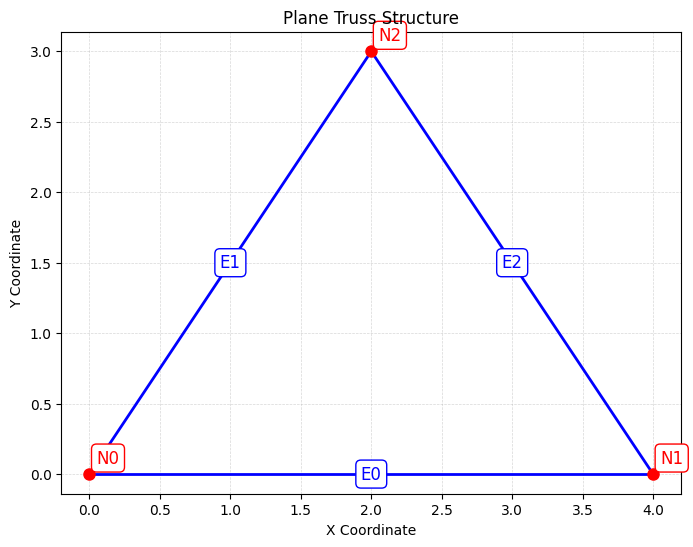

In [119]:
truss.plot_plane_truss() # Plot the truss structure

We can also inspect the length and angle of each element using the `get_angle` and `get_length` methods, respectively, which take the element index as an argument:

In [120]:
# For example, print the length and angle of the first element (index 0)
print("Length and angle of the first element:")
print(truss.get_length(0), "m")
print(truss.get_angle(0), "degrees")

Length and angle of the first element:
4.0 m
0.0 degrees


If we need some information about the PlaneTrussProblem class or some of its methods, we can use the `help` function to get a list of all the methods and their docstrings. For example, to get help on the `plot_plane_truss` method, we can do:

In [121]:
help(truss.plot_plane_truss)

Help on method plot_plane_truss in module CSM.plane_truss:

plot_plane_truss(show_node_indices=True, show_element_indices=True) method of CSM.plane_truss.PlaneTrussProblem instance
    Function to plot the plane truss:
    - Nodes are represented as circles and optionally labeled with their indices.
    - Elements are represented as lines connecting the nodes and optionally labeled with their indices.
    
    Parameters:
    show_node_indices (bool): If True, display the node indices on the plot.
    show_element_indices (bool): If True, display the element indices on the plot.



4. **Assemble the Global Stiffness Matrix**: we call the `assemble_global_stiffness` method to assemble the global stiffness matrix. As mentioned earlier, the global stiffness matrix is obtained by assembling the element stiffness matrices.

In [122]:
K = truss.assemble_global_stiffness()
# Print the global stiffness matrix
print("Global stiffness matrix:")
print(K)

Global stiffness matrix:
[[ 7.04210833e+03  2.68816249e+03 -5.25000000e+03  0.00000000e+00
  -1.79210833e+03 -2.68816249e+03]
 [ 2.68816249e+03  4.03224373e+03  0.00000000e+00  0.00000000e+00
  -2.68816249e+03 -4.03224373e+03]
 [-5.25000000e+03  0.00000000e+00  7.04210833e+03 -2.68816249e+03
  -1.79210833e+03  2.68816249e+03]
 [ 0.00000000e+00  0.00000000e+00 -2.68816249e+03  4.03224373e+03
   2.68816249e+03 -4.03224373e+03]
 [-1.79210833e+03 -2.68816249e+03 -1.79210833e+03  2.68816249e+03
   3.58421665e+03  9.09494702e-13]
 [-2.68816249e+03 -4.03224373e+03  2.68816249e+03 -4.03224373e+03
   9.09494702e-13  8.06448747e+03]]


5. **Apply Boundary Conditions** (*optional*): we apply the boundary conditions by setting the fixed DOFs to zero. To do this, we can use the `set_external_constraints` method, which takes a list as input. Each element of the list is the index of the DOF to be fixed. In this case, we will set the first node as fixed in both directions and the second node as fixed in the vertical direction only. The method will also partition the global stiffness matrix `K`, removing the rows and columns corresponding to the fixed node. The resulting matrix will be a reduced matrix that can be used to solve the system of equations.

In [123]:
Reduced_K = truss.set_external_constraints([0,1,3])
# Print the reduced stiffness matrix
print("Reduced stiffness matrix:")
print(Reduced_K)

Reduced stiffness matrix:
[[ 7.04210833e+03 -1.79210833e+03  2.68816249e+03]
 [-1.79210833e+03  3.58421665e+03  9.09494702e-13]
 [ 2.68816249e+03  9.09494702e-13  8.06448747e+03]]


6. **Solve the System of Equations**: we call the `solve` method to solve the system of equations for the unknown nodal displacements. The method returns the global nodal displacement vector `U`, which contains the displacements of all nodes in the system. In doing so, the method will also automatically call the `set_external_constraints` method to apply the boundary conditions and therefore we don't need to call it explicitly as we did in the previous step just to show how it works. The `solve` method takes as input the list of external forces `F` and the list of fixed DOFs.

In [124]:
F = [0, 5, -10] # Define the force vector
fixed_dofs = [0, 1, 3] # Define the fixed degrees of freedom
# Solve the system with the given force vector and fixed nodes
U = truss.solve(F, fixed_dofs)
# Print the displacements
print("Displacements (m):")
print(U)

Displacements (m):
[ 0.          0.          0.00111111  0.          0.00195056 -0.00161037]


We can obtain the displacements of a specific node by calling the `get_displacement` method, which takes as input the index of the node. The method returns the displacements of the node:

In [125]:
# For example, get the displacement of the third node (index 2)
u3 = truss.get_displacement(2)
# Print the displacement of the third node
print("Displacements of the third node (m):")
print(u3)


Displacements of the third node (m):
(0.0019505605133243614, -0.0016103747772759748)


7. **Compute the Reaction Forces**: we can get the global force vector `F` by calling the `get_reaction_forces` method. This method returns the global force vector `F`, which contains the forces acting on all nodes in the system.

In [126]:
# Get the reaction forces
F = truss.get_reaction_forces()
# Print the reaction forces
print("Reaction forces (kN):")
print(F)

Reaction forces (kN):
[-5.00000000e+00  1.25000000e+00  2.73070452e-16  8.75000000e+00
  5.00000000e+00 -1.00000000e+01]


8. **Compute the Element Stress**: we can get the element stress by calling the `get_element_stress` method. This method takes as input the index of the element and returns the element stress for the element.

In [127]:
# For example, get the element stress for the third element (index 2)
stress = truss.get_element_stress(2)
# Print the stress of the third element
print("Stress of the third element (Pa):")
print(stress)

Stress of the third element (Pa):
-105161.91220103303


9. **Compute the Element Force**: we can get the element force by calling the `get_element_force` method. This method takes as input the index of the element and returns the force acting on the element.

In [128]:
# For example, get the element force for the first element (index 0)
f = truss.get_element_force(0)
# Print the force of the first element
print("Force of the first element (kN):")
print(f)

Force of the first element (kN):
5.833333333333332


### Example Problem 2

In this second example, we will solve a problem consisting of a plane truss structure of rectangular shape composed of six elements and four nodes. The rectangular truss has a base `L = 4.0 m` and a height `h = 3.5 m`; the cross-sectional area of the elements is `A = 0.004 m^2` and the elasticity modulus is `E = 70 MPa`. The third node of the plane truss is subjected to an horizontal load of `F = 30 kN`. The first node is fixed in both directions by an hinge, while to the fourth node an inclined support is applied at an angle of `alpha = 45°`.

### Solution Steps using CSM

We will follow the same steps as in the previous example to solve this problem very quickly and easily using the CSM framework.

First we define the problem and visualize its structure:

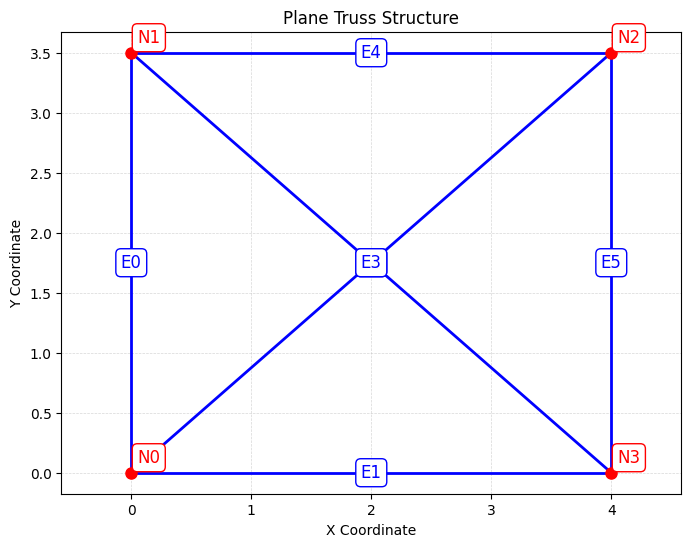

In [129]:
nodes = [(0, 0), (0, 3.5), (4, 3.5), (4, 0)] # 4 nodes
elements = [(0, 1), (0, 3), (0, 2), (1, 3), (1, 2), (2, 3)] # 6 elements
# Define the material properties
elasticity_modulus = 70e6
cross_sectional_area = 0.004
# Create an instance of the PlaneTrussProblem class
truss = PlaneTrussProblem(nodes, elements, elasticity_modulus, cross_sectional_area)

# Plot the plane truss structure
truss.plot_plane_truss()

We then assemble the global stiffness matrix:

In [130]:
K = truss.assemble_global_stiffness()
# Print the global stiffness matrix
print("Global stiffness matrix:")
print(K)

Global stiffness matrix:
[[ 9.98366690e+04  2.61070853e+04 -2.99951957e-28 -4.89858720e-12
  -2.98366690e+04 -2.61070853e+04 -7.00000000e+04  0.00000000e+00]
 [ 2.61070853e+04  1.02843700e+05 -4.89858720e-12 -8.00000000e+04
  -2.61070853e+04 -2.28436997e+04  0.00000000e+00  0.00000000e+00]
 [-2.99951957e-28 -4.89858720e-12  9.98366690e+04 -2.61070853e+04
  -7.00000000e+04  0.00000000e+00 -2.98366690e+04  2.61070853e+04]
 [-4.89858720e-12 -8.00000000e+04 -2.61070853e+04  1.02843700e+05
   0.00000000e+00  0.00000000e+00  2.61070853e+04 -2.28436997e+04]
 [-2.98366690e+04 -2.61070853e+04 -7.00000000e+04  0.00000000e+00
   9.98366690e+04  2.61070853e+04 -2.69956761e-27 -1.46957616e-11]
 [-2.61070853e+04 -2.28436997e+04  0.00000000e+00  0.00000000e+00
   2.61070853e+04  1.02843700e+05 -1.46957616e-11 -8.00000000e+04]
 [-7.00000000e+04  0.00000000e+00 -2.98366690e+04  2.61070853e+04
  -2.69956761e-27 -1.46957616e-11  9.98366690e+04 -2.61070853e+04]
 [ 0.00000000e+00  0.00000000e+00  2.6107085

We add the inclined support to the problem by calling the `add_inclined_support` method, which takes as input the index of the node and the angle of the support. The method will automatically modify the global stiffness matrix to account for the inclined support using the transformation matrix `T`.

In [131]:
truss.add_inclined_support(3, 45)
# Print the global stiffness matrix after adding the inclined support
print("Global stiffness matrix after adding inclined support:")
print(truss.K_global)

Global stiffness matrix after adding inclined support:
[[ 9.98366690e+04  2.61070853e+04 -2.99951957e-28 -4.89858720e-12
  -2.98366690e+04 -2.61070853e+04 -4.94974747e+04  4.94974747e+04]
 [ 2.61070853e+04  1.02843700e+05 -4.89858720e-12 -8.00000000e+04
  -2.61070853e+04 -2.28436997e+04  0.00000000e+00  0.00000000e+00]
 [-2.99951957e-28 -4.89858720e-12  9.98366690e+04 -2.61070853e+04
  -7.00000000e+04  0.00000000e+00 -2.63721387e+03  3.95582080e+04]
 [-4.89858720e-12 -8.00000000e+04 -2.61070853e+04  1.02843700e+05
   0.00000000e+00  0.00000000e+00  2.30756213e+03 -3.46134320e+04]
 [-2.98366690e+04 -2.61070853e+04 -7.00000000e+04  0.00000000e+00
   9.98366690e+04  2.61070853e+04 -1.03914727e-11 -1.03914727e-11]
 [-2.61070853e+04 -2.28436997e+04  0.00000000e+00  0.00000000e+00
   2.61070853e+04  1.02843700e+05 -5.65685425e+04 -5.65685425e+04]
 [-4.94974747e+04  0.00000000e+00 -2.63721387e+03  2.30756213e+03
  -1.03914727e-11 -5.65685425e+04  7.52330990e+04  1.50351536e+03]
 [ 4.94974747e

We can then solve the problem and get the global nodal displacements:

In [132]:
F = [0, 0, 30, 0 ,0] # Define the force vector
fixed_dofs = [0, 1, 7] # Define the fixed degrees of freedom
# Solve the system with the given force vector and fixed nodes
U = truss.solve(F, fixed_dofs)
# Print the displacements
print("Displacements (m):")
print(U)

Displacements (m):
[ 0.          0.          0.00060525  0.00015896  0.00081287 -0.00033655
 -0.00023672  0.        ]


Finally, we can compute the reaction forces and the element stresses:

In [133]:
# Get the reaction forces
F = truss.get_reaction_forces()
# Print the reaction forces
print("Reaction forces (kN):")
print(F)

Reaction forces (kN):
[-3.75000000e+00 -2.62500000e+01 -1.77635684e-15  0.00000000e+00
  3.00000000e+01  0.00000000e+00  0.00000000e+00  3.71231060e+01]


In [134]:
for i in range(len(elements)):
    # Get the element stresses for the i-th element
    stress = truss.get_element_stress(i)
    # Print the stress of the i-th element
    print("Stress of the element", i, "(Pa):")
    print(stress)

Stress of the element 0 (Pa):
3179.1201787172517
Stress of the element 1 (Pa):
-4142.542362323818
Stress of the element 2 (Pa):
5137.974405728529
Stress of the element 3 (Pa):
-6966.62758417667
Stress of the element 4 (Pa):
3633.280204248289
Stress of the element 5 (Pa):
-6731.059587856135


### Example Problem 3

In this final example, we will solve a problem consisting of a plane truss structure of trapezoidal shape composed of nine elements and six nodes. The trapezoidal truss has a base `L = 15.0 m` and a height `h = 7 m`; the cross-sectional area of the elements is `A = 0.005 m^2` and the elasticity modulus is `E = 210 MPa`. The first and sixth nodes of the plane truss are fixed in both directions by an hinge, while an horizontal load of `F = 20 kN` is applied to the second node.

### Solution Steps using CSM

We will follow the same steps as in the previous examples to solve this problem very quickly and easily using the CSM framework.

As always, first we define the problem and visualize its structure:

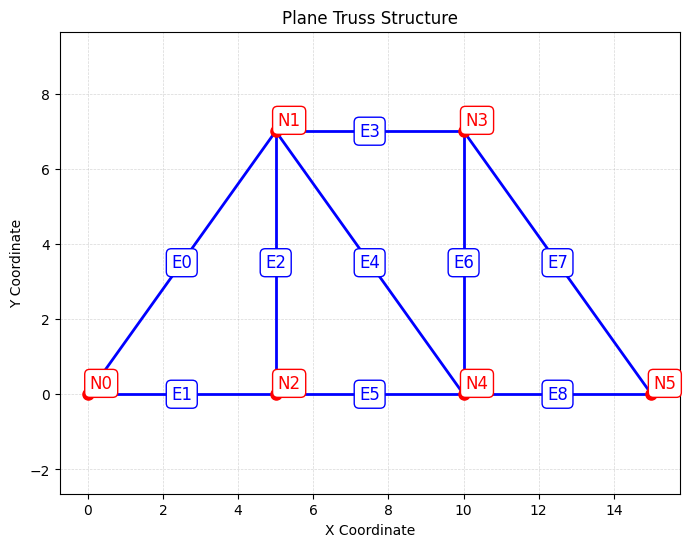

In [135]:
nodes = [(0, 0), (5, 7), (5, 0), (10, 7), (10, 0), (15, 0)] # 6 nodes
elements = [(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5)] # 9 elements
# Define the material properties
elasticity_modulus = 210e6
cross_sectional_area = 0.005
# Create an instance of the PlaneTrussProblem class
truss = PlaneTrussProblem(nodes, elements, elasticity_modulus, cross_sectional_area)

# Plot the plane truss structure
truss.plot_plane_truss()

We then assemble the global stiffness matrix:

In [136]:
K = truss.assemble_global_stiffness()
# Print the global stiffness matrix
print("Global stiffness matrix:")
print(K)

Global stiffness matrix:
[[ 2.51236493e+05  5.77310909e+04 -4.12364935e+04 -5.77310909e+04
  -2.10000000e+05  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.77310909e+04  8.08235272e+04 -5.77310909e+04 -8.08235272e+04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.12364935e+04 -5.77310909e+04  2.92472987e+05  4.36557457e-11
  -5.06168927e-27 -2.75545530e-11 -2.10000000e+05  0.00000000e+00
  -4.12364935e+04  5.77310909e+04  0.00000000e+00  0.00000000e+00]
 [-5.77310909e+04 -8.08235272e+04  4.36557457e-11  3.11647054e+05
  -2.75545530e-11 -1.50000000e+05  0.00000000e+00  0.00000000e+00
   5.77310909e+04 -8.08235272e+04  0.00000000e+00  0.00000000e+00]
 [-2.10000000e+05  0.00000000e+00 -5.06168927e-27 -2.75545530e-11
   4.20000000e+05  2.75545530e-11  0.00000000e+00  0.00000000e+00
  -2.10000000e+05  0.00000000e+00  0.00000000e+

We can then solve the problem and get the global nodal displacements:

In [137]:
F = [20, 0, 0, 0 ,0, 0, 0, 0] # Define the force vector
fixed_dofs = [0, 1, 10, 11] # Define the fixed degrees of freedom
# Solve the system with the given force vector and fixed nodes
U = truss.solve(F, fixed_dofs)
# Print the displacements
print("Displacements (m):")
print(U)

Displacements (m):
[ 0.00000000e+00  0.00000000e+00  2.08342818e-04 -3.33383724e-05
  1.05820106e-05 -3.33383724e-05  1.76596787e-04  1.06626354e-05
  2.11640212e-05 -5.15595868e-05  0.00000000e+00  0.00000000e+00]


Finally, we can compute the reaction forces:

In [138]:
# Get the reaction forces
F = truss.get_reaction_forces()
# Print the reaction forces
print("Reaction forces (kN):")
print(F)

Reaction forces (kN):
[-8.88888889e+00 -9.33333333e+00  2.00000000e+01 -4.44089210e-16
  6.83806310e-16  5.68111400e-16 -2.44249065e-15  0.00000000e+00
  6.66133815e-16 -1.77635684e-15 -1.11111111e+01  9.33333333e+00]
